# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
#%load_ext autoreload
#%autoreload 2
%reload_ext autoreload
import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 10.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

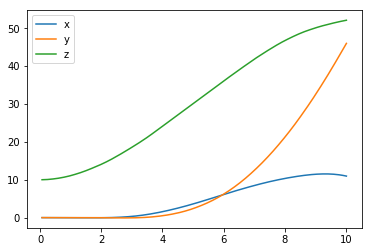

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

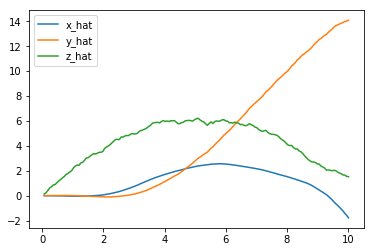

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

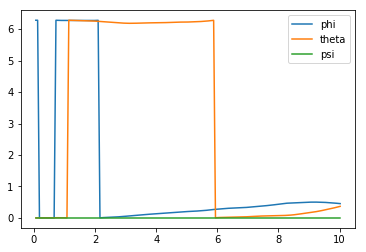

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

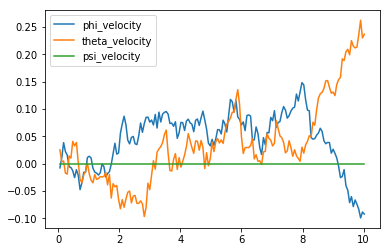

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

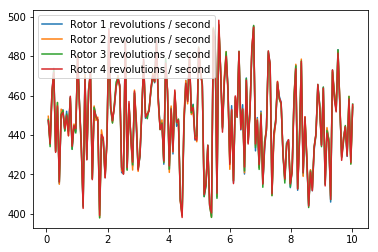

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 10.96477377  46.00449747  52.1157456    0.45475062   0.36724282   0.        ]
[ -1.78514393  14.08214621   1.52220409]
[-0.09235727  0.23657853  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.161 (best =  -0.003), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [14]:
## TODO: Train your agent here.

## My Objective:
> **Train Quadcopter to Land Softly** Using 
>- DDPG: Deep Deterministic Policy Gradients

In [1]:
from agents.zz_agent import Actor, Critic, DDPG, OUNoise, ReplayBuffer

Using TensorFlow backend.


In [2]:
%reload_ext autoreload

import csv
import numpy as np
import sys
import pandas as pd
from zz_task import Task
import copy
# Modify the values below to give the quadcopter a different starting position.
runtime = 3.                                    # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'mydata.txt'                         # file name for saved results


#set up 
num_episodes = 2000
target_pos = np.array([0., 0., 0.])
task = Task(target_pos=target_pos)
agent = DDPG(task) 
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
rewards_record=[]
best_score=-100


# Run the simulation
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score=0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        score  += reward
        agent.step(action, reward, next_state, done)
        state = next_state
        #save the reults from last run 
        if i_episode ==num_episodes:
            with open(file_output, 'w') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow(labels)
                while True:
                    rotor_speeds = agent.act(state)
                    _, _, done = task.step(rotor_speeds)
                    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
                    for ii in range(len(labels)):
                        results[labels[ii]].append(to_write[ii])
                    writer.writerow(to_write)
                    if done:
                        break 
   
        if done:
            best_score = max(score, best_score)
            print("\rEpisode = {:4d}, score = {:4.3f}, best score = {:4.6f}".format(i_episode, score, best_score), end="")  # [debug]
            rewards_record.append(score)
            break
    sys.stdout.flush()

Episode = 2000, score = -0.007, best score = 16.400569999

### ZZ: 3D plot to gain intuitive understanding on how the quadcopter flying 

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def loc_plot(results, vars=['x', 'y', 'z'], title=''):
    x = results['x']
    y = results['y']
    z = results['z']
    c = results['time']
    
    fig = plt.figure(figsize=(8, 4), dpi=100)
    ax = plt.axes(projection='3d')
    cax = ax.scatter(x, y, z, c=c, cmap='PuBu')
    ax.set(xlabel='x', ylabel='y', zlabel='z', title=title )
    fig.colorbar(cax, label='Number of Time step', pad=0.1, aspect=50)
    plt.show();

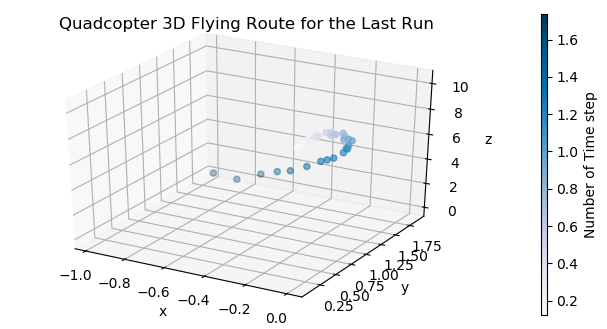

In [15]:
loc_plot(results, vars=['x', 'y', 'z'],title="Quadcopter 3D Flying Route for the Last Run")

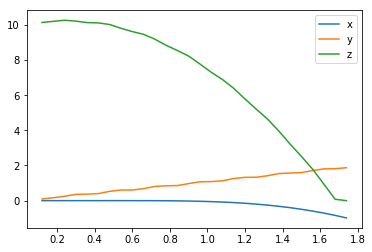

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

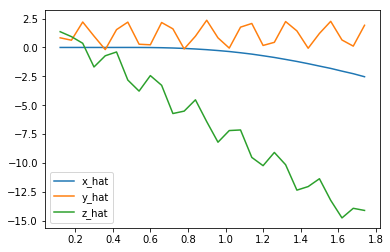

In [17]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

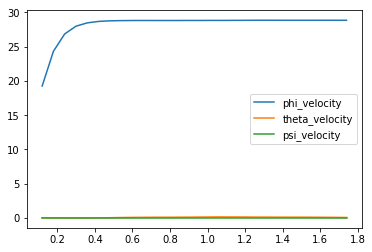

In [18]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

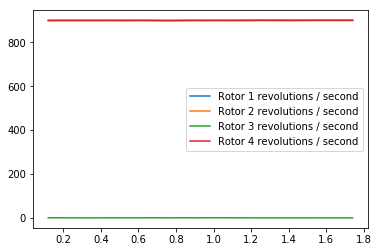

In [19]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

## 0.Reward plot using Default Reward

> reward = 1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum()

The average of last 10 reward is -151.65076973151187


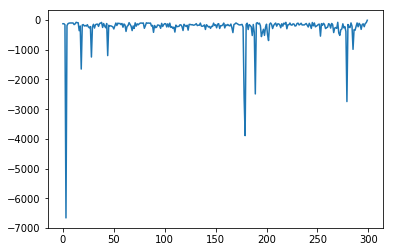

In [22]:
## TODO: Plot the rewards. 
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

## 1.Reward plot using Trial 1

>-  reward = 10 - .5*(abs(self.sim.pose[2] - self.target_pos[2])) + .3*self.sim.v[2]
>-  changes made to only penalize the position of z to ensure it is landed and add penalty to speed of z to ensure it is landed softly

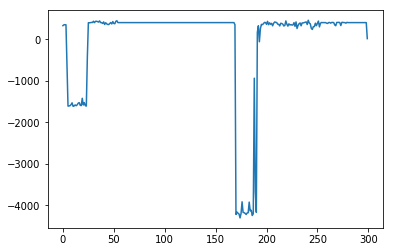

In [12]:
## TODO: Plot the rewards. 
import matplotlib.pyplot as plt
plt.plot(rewards_record)

## 2.Reward plot using Trial 2 

>- reward = 10 - .5*(abs(self.sim.pose[2] - self.target_pos[2])) + .3*self.sim.v[2] - .2*(abs(self.sim.pose[0:2] - self.target_pos[0:2])).sum() 
>- based on trial 1, add penalty to not landed at right position in x, y 

The average of last 10 reward is 326.0302504100715


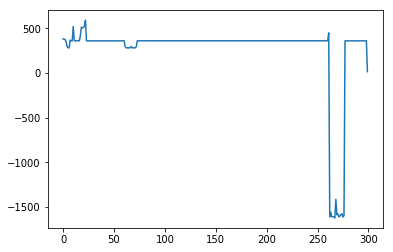

In [21]:
## TODO: Plot the rewards. 
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

## 3.Reward plot using Trial 3 

>  reward = 1 - .01*(abs(self.sim.pose[2] - self.target_pos[2]))**2 - .003*abs(self.sim.v[2])**2 - .1*(abs(self.sim.pose[0:2] - self.target_pos[0:2])).sum() - 0.00005*(self.sim.v[0]**2+ self.sim.v[1]**2 )

> changes mades:
   >- change constant for continuing flying from 10 to 1 
   >- add penalty for speed at x and y level
   >- also extend the episode from 300 to 1000 as from the trial 2, it seems we need a lot more episodes to stabilize the performance

The average of last 10 reward is -9.436777367663591


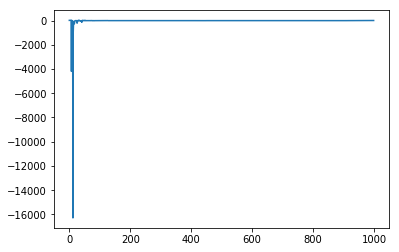

In [11]:
## TODO: Plot the rewards. 
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

## 4.Reward plot using Trial 4

> if self.sim.pose[2] >0:
    reward = 1 - .3*(abs(self.sim.pose[2] - self.target_pos[2])) - .003*abs(self.sim.v[2])**2
else:
    reward = 1 - .01*(abs(self.sim.pose[2] - self.target_pos[2]))**2 - .003*abs(self.sim.v[2])**2 - .1*(abs(self.sim.pose[0:2] - self.target_pos[0:2])).sum() - 0.00005*(self.sim.v[0]**2+ self.sim.v[1]**2 )
    
> Not adding penalty of velocity at x and y when they are flying

The average of last 10 reward is -107.49505731783475


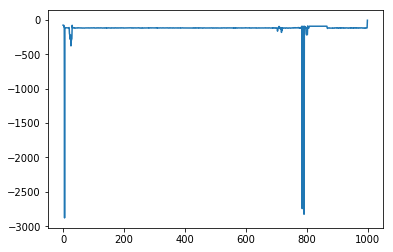

In [6]:
## TODO: Plot the rewards. 
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

In [11]:
## 5.Reward plot using Trial 5

>- Allow velocity of x & y when it is not laned, -5 when it is go below z =0 
>- reward 
        if self.sim.pose[2] >0:
            reward = 1 - .3*(abs(self.sim.pose[2] - self.target_pos[2])) - .003*abs(self.sim.v[2])**2
        if self.sim.pose[2] == 0:
            reward = 10 - .003*abs(self.sim.v[2]) - .1*(abs(self.sim.pose[0:2] - self.target_pos[0:2])).sum() - 0.00005*(self.sim.v[0]**2+ self.sim.v[1]**2 )
        else:
            reward -= 5
        return reward

The average of last 10 reward is -444.0408817823246


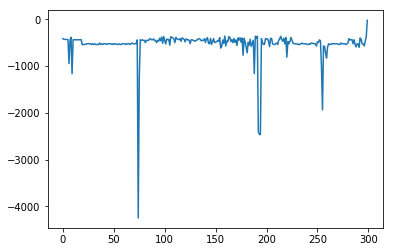

In [5]:
## TODO: Plot the rewards. 
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

## 6.Reward plot using Trial 6

> keep the reward the same, but change some other settings:
    >- For the next trial, I want to set maximum speed, hence i change action_high from default 900 to 100
    >- I have also noticed the best_score as 0 is not ideal as our reward is always less than that, so changed it to -100
> reward is defined the same as Trial 4


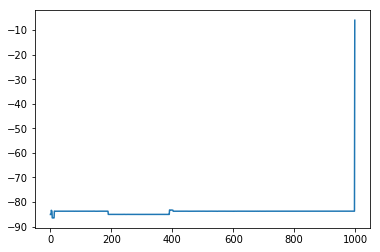

In [9]:
## TODO: Plot the rewards. 
import matplotlib.pyplot as plt
plt.plot(rewards_record)


## 7.Reward plot using Trial 7

> keep the reward the same, but change some other settings:
    >- The speed of z has reduced and we have much less negative rewards, so we are in right direction
    >- Rotor 3 is 0, so probably we shall incresae the action_low as well from 0 to 50

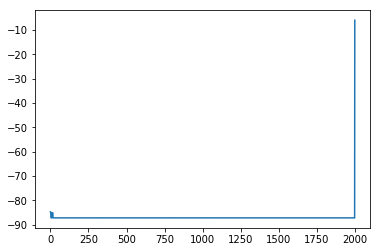

In [6]:
## TODO: Plot the rewards. 
import matplotlib.pyplot as plt
plt.plot(rewards_record)

## 8.Reward plot using Trial 8

>  reward

        reward = 1 - .01*(abs(self.sim.pose[2] - self.target_pos[2]))**2 - .003*abs(self.sim.v[2])**2 - .1*(abs(self.sim.pose[0:2] - self.target_pos[0:2])).sum() - 0.00005*(self.sim.v[0]**2+ self.sim.v[1]**2 )
        if self.sim.time < self.sim.runtime and self.sim.done == True:
            reward -= 5
> Add penalty for ending simulation before runtime

The average of last 10 reward is -356.76473524470737


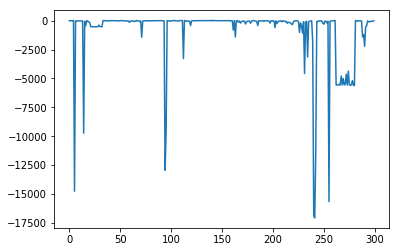

In [5]:
## TODO: Plot the rewards. 
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

## 9.Reward plot using Trial 9

> reward =  1 - .3*(abs(self.sim.pose[2] - self.target_pos[2])) - .003*abs(self.sim.v[2])**2 - .1*(abs(self.sim.pose[0:2] - self.target_pos[0:2])).sum() - 0.00005*(self.sim.v[0]**2+ self.sim.v[1]**2 )
        if self.sim.time < self.sim.runtime and self.sim.done == True:
            reward -= 5
        if abs(self.sim.v[2]) > 5:
            reward -= 2

> Adding penalty for high velocity of z       

The average of last 10 reward is -321.14188109257225


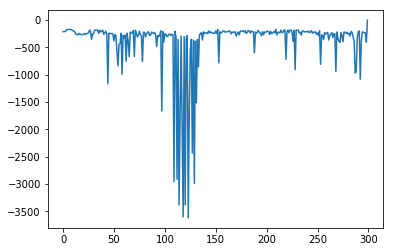

In [4]:
## TODO: Plot the rewards. 
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

## 10.Reward plot using Trial 10


> reward =  1 - .5*(abs(self.sim.pose[2] - self.target_pos[2])) -.3*abs(self.sim.v[2])
        if self.sim.time < self.sim.runtime and self.sim.done == True:
            reward -= 2
 
> Go with the simple apporach similar to trial 2 and penalize if simulation ends before runtime

The average of last 10 reward is -644.3845436710593


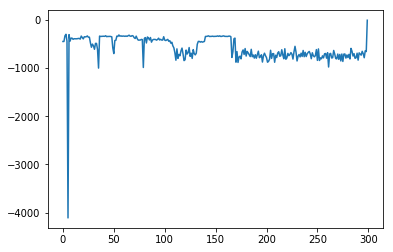

In [10]:
## TODO: Plot the rewards. 
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

# <font color=purple> After the first review - Adjustment based on the feedback

## 11. Reward plot trial 11

>- Increase Episode to 1000, using reward function trial 10 
>-  reward =  1 - .5*(abs(self.sim.pose[2] - self.target_pos[2])) -.3*abs(self.sim.v[2])
        if self.sim.time < self.sim.runtime and self.sim.done == True:
            reward -= 2
 

The average of last 10 reward is -572.3936153501111


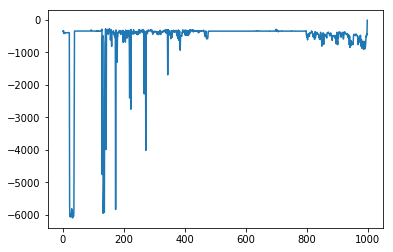

In [9]:
## TODO: Plot the rewards. 
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

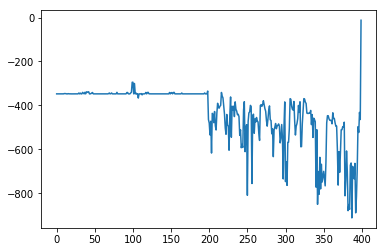

In [10]:
plt.plot(rewards_record[-400:])

## 12. Reward plot trial 12

>- It seems increasing episode to 1000 instead of 300 does not solve the issue
>- Now I continue adjust reward function inspired by the recommended video: https://www.youtube.com/watch?v=0R3PnJEisqk&t=3s
>- 
        if self.sim.pose[2] == self.target_pos[2]:
            if self.sim.v[2] < 1:
                if (self.sim.pose[0] < 0.5) and (self.sim.pose[1] < 0.5):
                    reward =10 
                else: reward = -1 # land too far away from the landing zone
            else: reward = -10  #too high speed, hence not landing softly
        else:
            #to encourage approaching to landing zone
            reward =  1 -  (abs(self.sim.pose[2] - self.target_pos[2])/10)

The average of last 10 reward is -1331.6598128847834


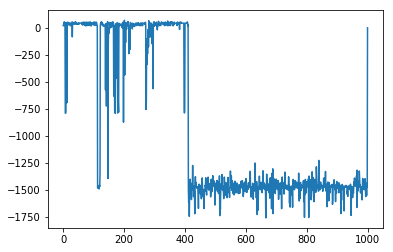

In [8]:
## TODO: Plot the rewards. 
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

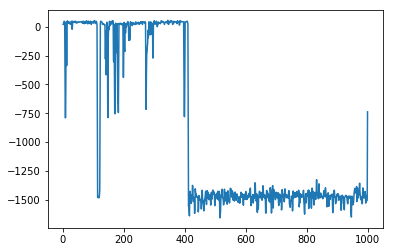

In [11]:
df = pd.DataFrame(rewards_record)
plt.plot(df.rolling(window=2).mean())

## 13. Reward plot trial 13

>- Change the reward only focus on z (position and velocity)
        
dist_reward = 1 - 0.1*abs(self.sim.pose[2] - self.target_pos[2])
        vel_discount = 1/max(abs(self.sim.v[2]),0.001)
        reward = dist_reward*vel_discount

The average of last 10 reward is 51.90153218382342


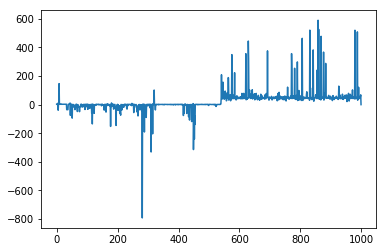

In [12]:
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

## 14. Reward plot trial 14

>- Extend episode to 2000, as from graph above, it is about to be stablized 

The average of last 10 reward is 1.8366142281348008


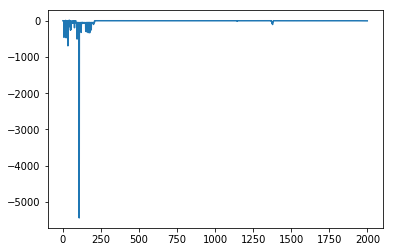

In [9]:
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

## 15. Reward plot trial 15

>- Use np.tanh to normalize the rewards to small value to better help the neural networks learn the gradient parameters without high magnitude deviations
>- reward 
        dist_reward = 1- np.tanh(abs(self.sim.pose[2] - self.target_pos[2]))
        vel_discount = 1/max(abs(self.sim.v[2]),0.001)
        reward = dist_reward*vel_discount


The average of last 10 reward is 0.3642341387743958


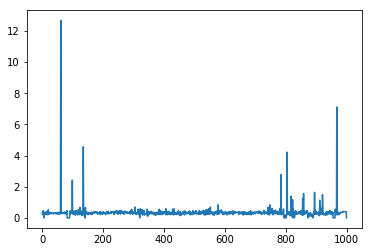

In [9]:
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

## 16. Reward plot trial 16

>- Adjust reward to tanh

        dist_reward = 1 - np.tanh(abs(self.sim.pose[2] - self.target_pos[2]))
        vel_discount = 1 - np.tanh(abs(self.sim.v[2]))
        reward = dist_reward*vel_discount

The average of last 10 reward is 1.310997892986762e-08


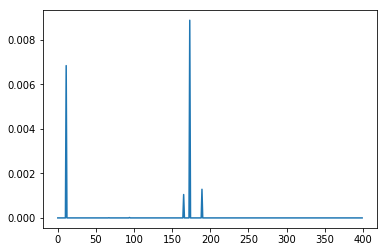

In [10]:
import matplotlib.pyplot as plt
plt.plot(rewards_record[-400:])
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

## 17. Reward plot trial 17

> Ajust the velolity discount to be logarithm instead of tanh

        dist_reward = 1 - np.tanh(abs(self.sim.pose[2] - self.target_pos[2]))
        vel_discount = 2 - math.log10(abs(self.sim.v[2]+1))
        reward = dist_reward*vel_discount

The average of last 10 reward is 6.606007949765874e-08


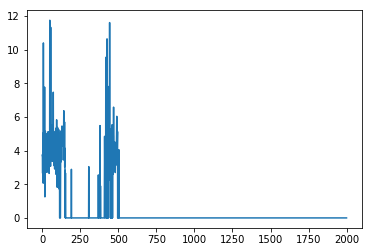

In [18]:
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

## 18. Reward plot trial 18

>- Attempt to use additive penalty for velocity of z
      reward = 1 - np.tanh(abs(self.sim.pose[2] - self.target_pos[2])) -    np.tanh(abs(self.sim.v[2]))

The average of last 10 reward is -59.819226810548216


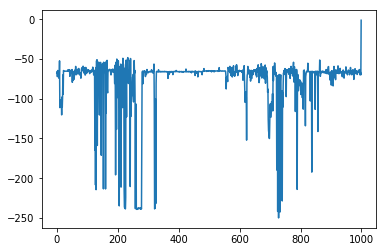

In [12]:
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
> My task is to train the quadcopter **land softly**. The py file is called 'zz_task.py'
> I have tried a couple reward function, the logic flow can be found above
>- Start with the original reward function to penalize being far away from target position
>- changes made to only penalize the position of z to ensure it is landed and add penalty to speed of z to ensure it is landed softly 
>- add penalty to not landed at right position in x, y
>- Not adding penalty of velocity of x and y when they are flying
>- Allow velocity of x & y when it is not laned, -5 when it is go below z =0
>- set maximum speed, hence I change action_high from default 900 to 100
I have also noticed the best_score as 0 is not ideal as our reward is always less than that, so changed it to -100 
>- Rotor 3 is 0, so probably we shall incresae the action_low as well from 0 to 50, but it gives very weird results, so change them back 
>- Add penalty for ending simulation before runtime
>- Adding bigger penalty for high velocity of z 

> I would choose trial 10 as my best attempt


## <font color = purple> Question 1 Revisited  <font>

> Worth mentioning again my task is to train the quadcopter **land softly**. The py file is called 'zz_task.py'. From the feedback, seems my task has been misunderstood as **take off**
>- As the feedback suggested, espisode of 300 is not enough, so I extended to 1000 in order to stablize the reward. However, as the graph in **trial 11** suggested, the results are still volatile
>- I then continue adjust reward function inspired by the recommended video: https://www.youtube.com/watch?v=0R3PnJEisqk&t=3s, the reword function is 

     if self.sim.pose[2] == self.target_pos[2]:
          if self.sim.v[2] < 1:
              if (self.sim.pose[0] < 0.5) and (self.sim.pose[1] < 0.5):
                  reward =10 
              else: reward = -1 # land too far away from the landing zone
          else: reward = -10  #too high speed, hence not landing softly
      else:
            #to encourage approaching to landing zone
            reward =  1 -  (abs(self.sim.pose[2] - self.target_pos[2])/10)
>- However the result is not promising, I got large negaive average reward for the last 10 episodes 
>- As the feedback suggested to only focus on z for now. I change the reward only focus on z (position and velocity) and extend the espisode to 2000, with reward function as:

     dist_reward = 1 - 0.1abs(self.sim.pose[2] - self.target_pos[2]) 
     vel_discount = 1/max(abs(self.sim.v[2]),0.001) 
     reward = dist_rewardvel_discount
>- Here comes my best attempt (Trial 14) with average reward to be 1.8 for the last 10 episodes. And the reward function seems stabilized, which indicates the agent has learnt how to land 

The average of last 10 reward is 1.8366142281348008


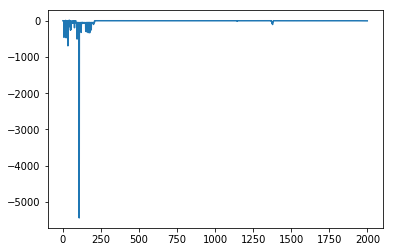

In [9]:
import matplotlib.pyplot as plt
plt.plot(rewards_record)
print("The average of last 10 reward is {}".format(np.mean(rewards_record[-10:])))

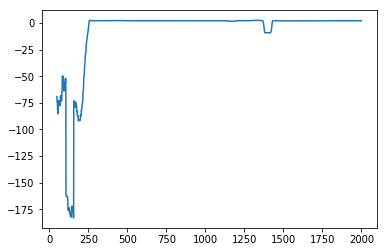

In [13]:
df = pd.DataFrame(rewards_record)
plt.plot(df.rolling(window=50).mean())

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
*
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
>-- I have only tried DDGP (Deep Deterministic Policy Gradients) as my learning algorithm because
 >- DDGP can be applied for continous action space problem, while Deep Q Network (DQN) can only solve discrete action space problem
 >- Experience replay is also used here to store the experience tuples in order to make more efficient use of observed experiences
 >- Fixed Q targets prevent issue of the target Q-values  moving in the same direction as Q-value updates. here $\tau$ = 0.01 is used to update the target parameters 
 >- Ornstein–Uhlenbeck Noise is used to change the policy parameters in order to reach global optimal, here  $\mu$ = 0, $\theta$ =0.15, $\sigma$ = 0.2 are used.

>-- My final choice of  hyperparameters are the default hyperparameters provided.  $\mu$ = 0, $\theta$ =0.15, $\sigma$ = 0.2 for noise process, and  $\gamma$ = 0.99  as discount factor and $\tau$ = 0.01  for soft update of target parameters

>-- I used the pre-provided actor critic implementation with pre-defined Neural Nets Architecture
     >- For Actor, it has 3 layers with 32,64, 32 neuros, with ReLu as activation function
     >- For Critic, it has 2 layers both states and action pathways, with ReLu as activation function


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
>- It is hard task for the quadcopter to learn, though it may seem very easy. 
>- it was more of gradual lerning curve. I attempt to add more/different penalties, hoping it will give me better reward results, but it did not happend. My aha moment happends at trial 10, when i finally reduced the velocity of z. With the feedback given, I also increased the number of episode from 300 to 1000 to allow the agent to learn for longer. It indeed gives more stabilized result.  In my later attempts (trials 11 onwards), I tried to not address all aspects of the behavior desired, and only focus on positiion and velocity of z
>- I would not say it was good final performance. But the reward was increasing overtime and stablized at the end

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
>- This project is no doubt the hardest one out of all. It took me a while to digest the pre-provided code
The hardest bit is defining reward function, I have tried more than 10 different reward functions, but none of them works satisfying so far.  Every time when I adjusted the reward function, hoping it will fix what I thought would be the reason why the reward was not high enough, but the result is not too satisfying. For example, I was trying to limit the rotors speed by reduction action_high, but the velocity of z is not reduced as expected 
>- It was very interesting, for most of my rewarding graphs, it was large negative value in the beginning. That trend has not change no matter how I adjust my reward function. Then I realize it might be a result of high speed. From many trials I notice some of them has a jump or drop in the last episode, I could not get my head around why that's happending.